In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

import dengue_utils as dutils
import dsutils as du

# Load Data

In [2]:
# Load dataset

features_train = pd.read_csv('../../data/dengue_features_train.csv')
labels_train   = pd.read_csv('../../data/dengue_labels_train.csv')

features_test = pd.read_csv('../../data/dengue_features_test.csv')

dengue_dataset = pd.concat([features_train, features_test], axis = 0)

# Join train labes and features
dengue_dataset_labeled = dengue_dataset.merge(labels_train, 
                                           left_on = ['city', 'year', 'weekofyear'], 
                                           right_on = ['city', 'year', 'weekofyear'],
                                           how = 'outer')

In [3]:
dengue_dataset_labeled.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1872.0,2003.194979,6.292268,1990.000000,1999.000000,2004.000000,2008.000000,2013.000000
weekofyear,1872.0,26.489316,15.006319,1.000000,13.750000,26.000000,39.000000,53.000000
ndvi_ne,1635.0,0.138588,0.146413,-0.463400,0.035300,0.127317,0.252225,0.508357
ndvi_nw,1809.0,0.129713,0.125082,-0.456100,0.041225,0.115200,0.223360,0.649000
ndvi_se,1849.0,0.204663,0.075064,-0.015533,0.153457,0.197029,0.250857,0.538314
ndvi_sw,1849.0,0.202174,0.085768,-0.063457,0.141014,0.188229,0.248086,0.546017
precipitation_amt_mm,1857.0,44.109278,42.065868,0.000000,9.430000,36.640000,67.500000,390.600000
reanalysis_air_temp_k,1860.0,298.727770,1.387410,294.554286,297.678929,298.617143,299.891429,302.200000
reanalysis_avg_temp_k,1860.0,299.253955,1.272510,294.892857,298.276786,299.300000,300.271429,303.328571
reanalysis_dew_point_temp_k,1860.0,295.284823,1.528046,289.642857,294.164643,295.667143,296.502857,298.450000


# Number of cases time-series

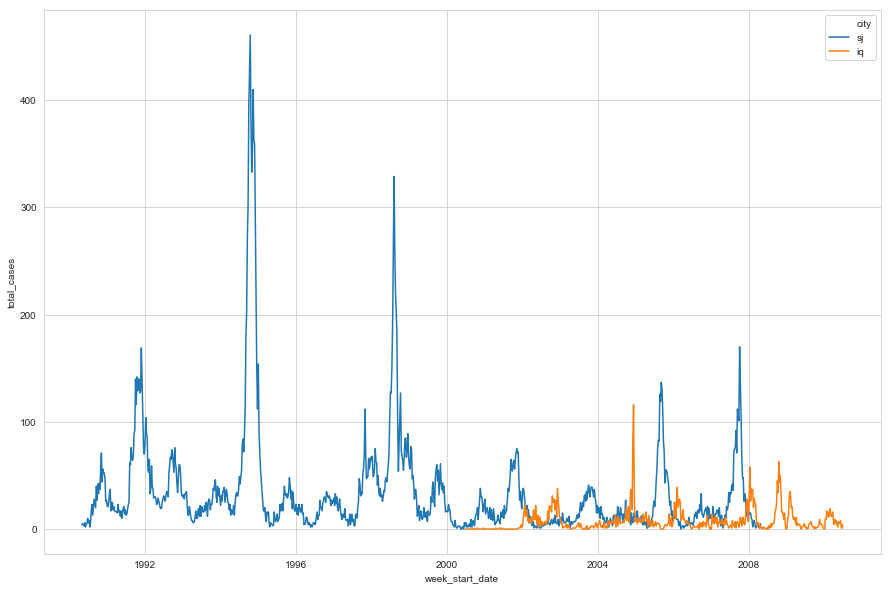

In [4]:
dengue_dataset_labeled['week_start_date'] = pd.to_datetime(dengue_dataset_labeled['week_start_date'])

du.show_lineplot(dengue_dataset_labeled, xvalue='week_start_date', yvalue='total_cases', hue='city')

# Correlation plot

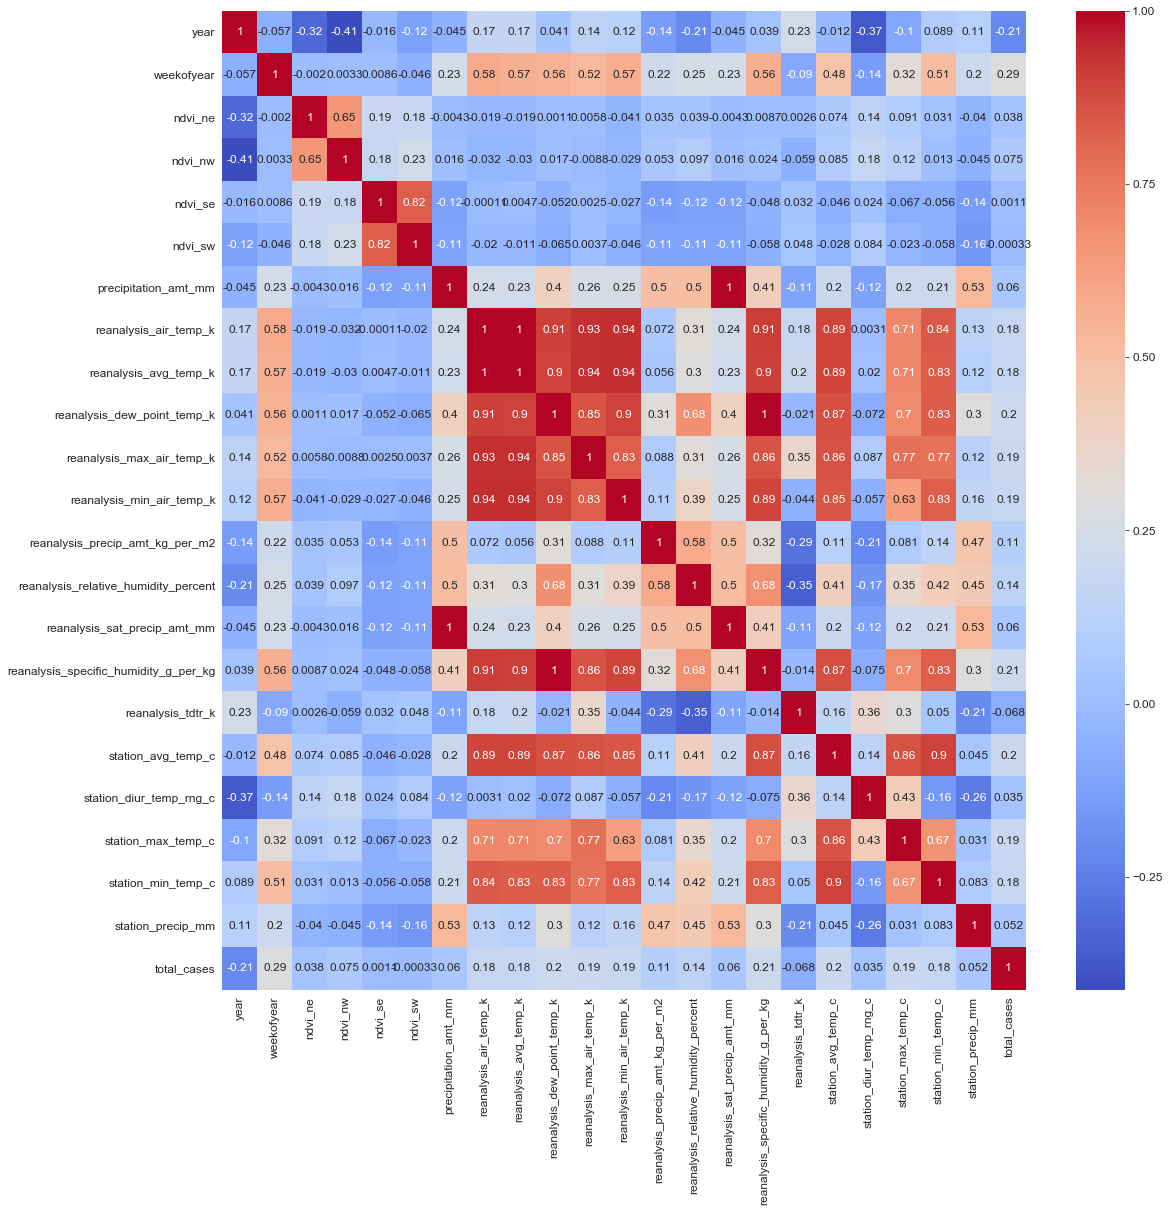

In [5]:
du.show_heatmap(dengue_dataset_labeled[dengue_dataset_labeled['city']=='sj'], exclude = ['city'])

# Correlation features vs label

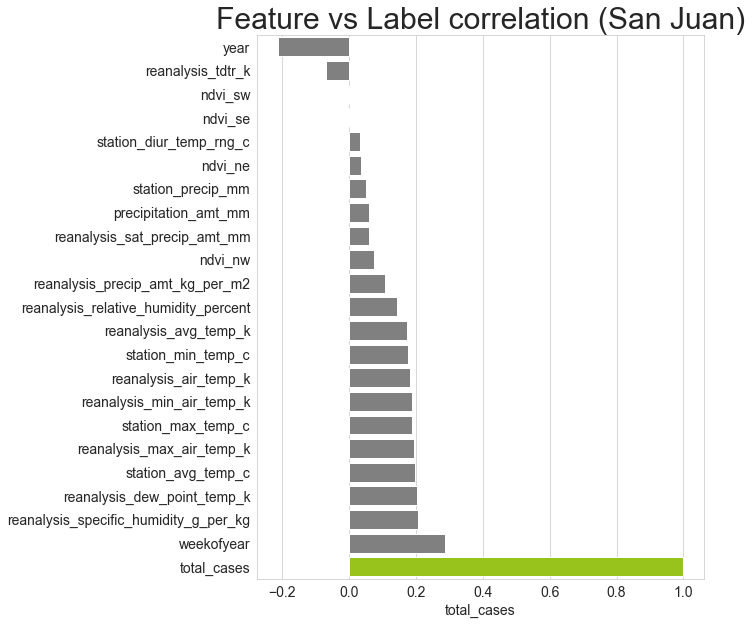

In [6]:
du.show_feature_correlation(dengue_dataset_labeled[dengue_dataset_labeled['city']=='sj'], 
                            label = 'total_cases', 
                            title= 'Feature vs Label correlation (San Juan)', 
                            exclude = ['city'])

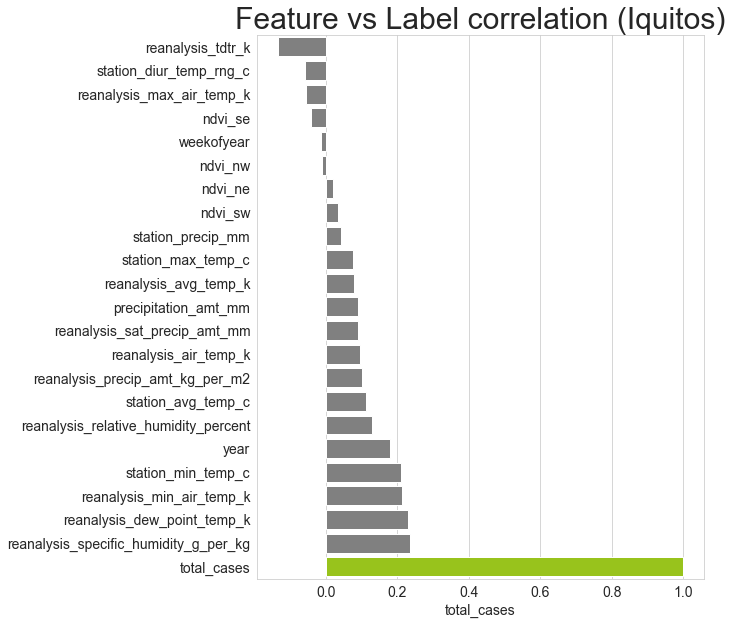

In [7]:
du.show_feature_correlation(dengue_dataset_labeled[dengue_dataset_labeled['city']=='iq'], 
                            label = 'total_cases', 
                            title= 'Feature vs Label correlation (Iquitos)', 
                            exclude = ['city'])

# Missing values

In [8]:
# Get list of cities to iterate among them

citylist = dengue_dataset_labeled.loc[:,'city'].unique()

# Get features

features = dengue_dataset_labeled.columns.drop(['year', 'weekofyear', 'week_start_date', 'total_cases', 'city'])


train_fetaures = ['reanalysis_specific_humidity_g_per_kg', 
                  'reanalysis_dew_point_temp_k', 
                  'station_avg_temp_c', 
                  'station_min_temp_c']

In [11]:
dengue_dataset_sj = dengue_dataset_labeled.loc[dengue_dataset_labeled.loc[:,'city'] == 'sj', :]

dengue_dataset_sj.loc[:,features] = dengue_dataset_sj.loc[:,features].fillna(method='ffill')

dengue_dataset_iq = dengue_dataset_labeled.loc[dengue_dataset_labeled.loc[:,'city'] == 'iq', :]

dengue_dataset_iq.loc[:,features] = dengue_dataset_iq.loc[:,features].fillna(method='ffill')


dengue_dataset_train_sj = dengue_dataset_sj.loc[~dengue_dataset_sj.loc[:,'total_cases'].isnull(), :]
dengue_dataset_test_sj  = dengue_dataset_sj.loc[dengue_dataset_sj.loc[:,'total_cases'].isnull(), :]

dengue_dataset_train_iq = dengue_dataset_iq.loc[~dengue_dataset_iq.loc[:,'total_cases'].isnull(), :]
dengue_dataset_test_iq  = dengue_dataset_iq.loc[dengue_dataset_iq.loc[:,'total_cases'].isnull(), :]



In [13]:
dengue_dataset_train_sj.shape

(936, 25)

In [14]:
dengue_dataset_train_iq.shape

(520, 25)

In [12]:
# Subtrain datasets

dengue_dataset_subtrain_sj = dengue_dataset_train_sj.head(800)
dengue_dataset_subtest_sj  = dengue_dataset_train_sj.tail(dengue_dataset_train_sj.shape[0] - 800)

dengue_dataset_subtrain_iq = dengue_dataset_train_iq.head(400)
dengue_dataset_subtrain_iq = dengue_dataset_train_iq.tail(dengue_dataset_train_iq.shape[0] - 400)

# Training

In [15]:
from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf

# Step 1: specify the form of the model
model_formula = "total_cases ~ 1 + " \
                "reanalysis_specific_humidity_g_per_kg + " \
                "reanalysis_dew_point_temp_k + " \
                "station_min_temp_c + " \
                "station_avg_temp_c"